In [424]:
!pip install tabulate
!pip install geopandas
!pip install pycountry
!pip install mapclassify

9074.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


9082.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


9089.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


9097.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [425]:
import matplotlib.pyplot as plt
import joblib
from tabulate import tabulate

In [426]:
GUARD_NODES_FILE = 'results/data/client_guard_nodes_final.joblib'

### Load files

In [427]:
guard_nodes = joblib.load(GUARD_NODES_FILE)

### Plot guard probability per ISP, AS and country

In [428]:
isps_count = {}
ases_count = {}
isps_countries = {}
ases_countries = {}
country_codes_count = {}
total_iterations = 0

In [429]:
def count_occurences():  
    for key, value in guard_nodes.items():
        isp = value["isp"]
        as_name = value["as"]
        country_code = value["country_code"]

        if isp not in isps_count:
            isps_count[isp] = 0
        isps_count[isp] += value["count"]

        if as_name not in ases_count:
            ases_count[as_name] = 0
        ases_count[as_name] += value["count"]

        if country_code not in country_codes_count:
            country_codes_count[country_code] = 0
        country_codes_count[country_code] += value["count"]

        if isp not in isps_countries:
            isps_countries[isp] = set()
        isps_countries[isp].add(country_code)

        if as_name not in ases_countries:
            ases_countries[as_name] = set()
        ases_countries[as_name].add(country_code)

        total_iterations += value["count"]
    
    return total_iterations

total_iterations = count_occurences()
print("\nisps_count", isps_count)
print("\nases_count", ases_count)
print("\ncountries_count", country_codes_count)
print("\nisps_countries", isps_countries)
print("\nases_countries", ases_countries)
print("\ntotal_iterations", total_iterations)


isps_count {'Zwiebelfreunde e.V.': 51, 'OVH ISP': 102, 'Hetzner Online GmbH': 639, 'netcup GmbH': 236, 'Strato AG': 44, 'Sharktech': 23, 'OVH SAS': 752, 'TMONL': 3, 'myLoc managed IT AG': 83, 'Sia Nano IT': 4, 'Psychz Networks': 74, 'Host Europe GmbH': 22, 'IONOS SE': 124, 'Oracle Corporation': 79, '1984 ehf': 3, 'SUNET C': 8, 'TerraHost': 6, 'Contabo GmbH': 42, 'GTHost': 34, 'Alexhost SRL': 16, 'Cogent Communications': 20, 'Fibrenoire Inc': 21, 'DataOppdrag': 8, 'IP-Connect LLC': 2, 'Online SAS': 5, 'SCHLUND': 9, 'PhoenixNAP LLC': 19, 'BLU-VH': 26, 'Melbikomas UAB': 7, 'Online SAS NL': 24, 'MivoCloud SRL': 10, 'Hetzner Online AG': 3, 'Ikoula Ripe': 4, 'Proxad / Free SAS': 13, 'SCALEWAY': 74, 'HostSlim B.V.': 5, 'HIVELOCITY, Inc.': 79, 'Master Internet s.r.o.': 5, 'FranTech Solutions': 18, 'Itelsì Network': 2, 'M247 Europe SRL': 25, 'Telia Company AB': 8, 'NORDUNET-CORE': 1, 'Verein zur Foerderung freier Netze Region Mittlerer Oberrhein e.V.': 2, 'Online S.A.S.': 70, 'BLU-VR': 4, 'Tel

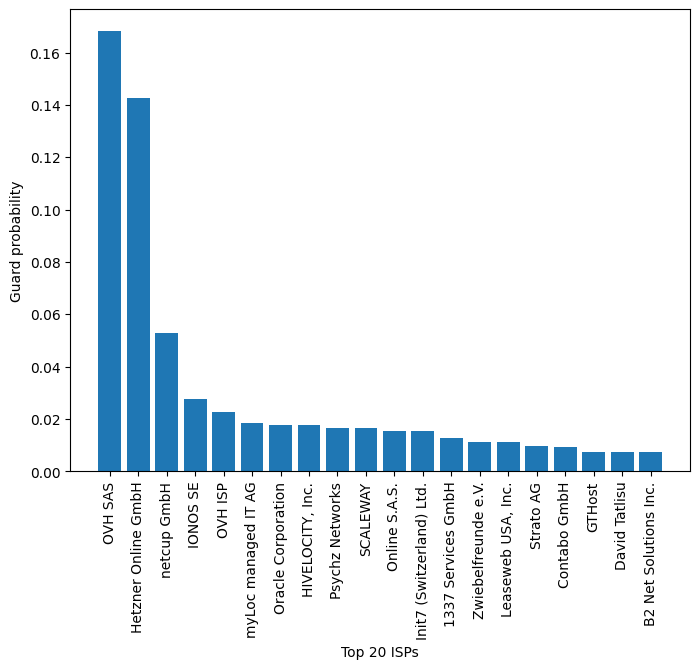

In [430]:
isp_guard_probabilities = {}

def plot_guard_probability_per_isp():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(isps_count.keys())
    total = sum(isps_count.values())
    lengths = [(s/total) for s in isps_count.values()]

    for key, prob in zip(keys, lengths):
        isp_guard_probabilities[key] = prob

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} ISPs')
    plt.ylabel('Guard probability')

    # Display the plot
    plt.show()

plot_guard_probability_per_isp()

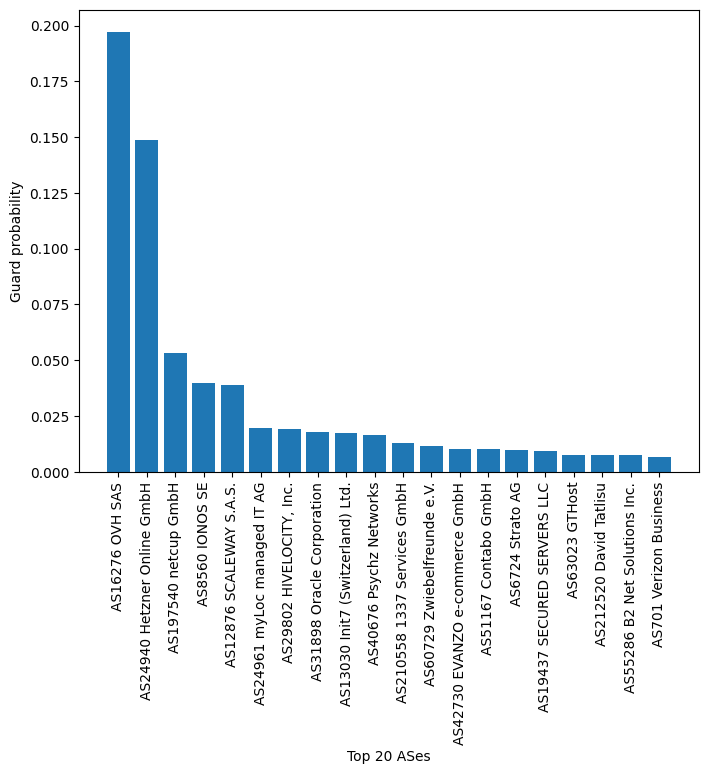

In [431]:
as_guard_probabilities = {}

def plot_guard_probability_per_as():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(ases_count.keys())
    total = sum(ases_count.values())
    lengths = [(s/total) for s in ases_count.values()]

    for key, prob in zip(keys, lengths):
        as_guard_probabilities[key] = prob

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} ASes')
    plt.ylabel('Guard probability')

    # Display the plot
    plt.show()

plot_guard_probability_per_as()

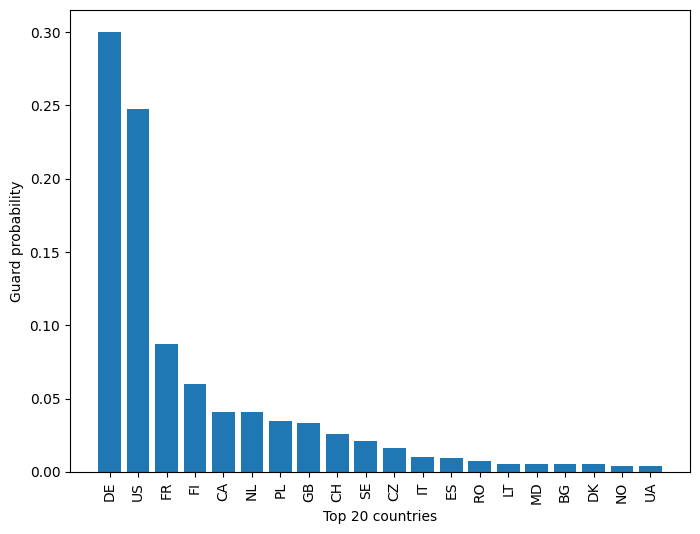

In [432]:
top_country_guard_probabilities = {}

def plot_guard_probability_per_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(country_codes_count.keys())
    total = sum(country_codes_count.values())
    lengths = [(s/total) for s in country_codes_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    for key, value in zip(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show]):
        top_country_guard_probabilities[key] = value

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} countries')
    plt.ylabel('Guard probability')

    # Display the plot
    plt.show()

plot_guard_probability_per_country()

In [433]:
eu_countries = [
    "AT",  # Austria
    "BE",  # Belgium
    "BG",  # Bulgaria
    "CY",  # Cyprus
    "CZ",  # Czech Republic
    "DE",  # Germany
    "DK",  # Denmark
    "EE",  # Estonia
    "ES",  # Spain
    "FI",  # Finland
    "FR",  # France
    "GR",  # Greece
    "HR",  # Croatia
    "HU",  # Hungary
    "IE",  # Ireland
    "IT",  # Italy
    "LT",  # Lithuania
    "LU",  # Luxembourg
    "LV",  # Latvia
    "MT",  # Malta
    "NL",  # Netherlands
    "PL",  # Poland
    "PT",  # Portugal
    "RO",  # Romania
    "SE",  # Sweden
    "SI",  # Slovenia
    "SK",  # Slovakia
]

eu_country_codes_count = {}
for eu_country in eu_countries:
    if eu_country in country_codes_count:
        eu_country_codes_count[eu_country] = country_codes_count[eu_country]

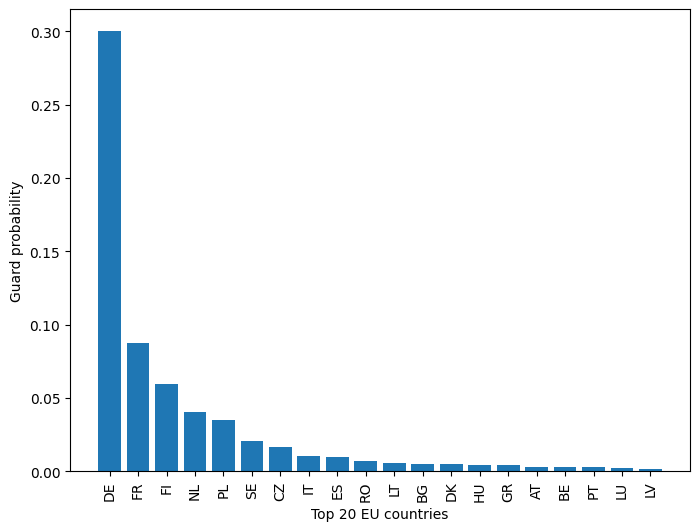

In [434]:
def plot_guard_probability_per_eu_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(eu_country_codes_count.keys())
    total = sum(country_codes_count.values())
    lengths = [(s/total) for s in eu_country_codes_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} EU countries')
    plt.ylabel('Guard probability')

    # Display the plot
    plt.show()

plot_guard_probability_per_eu_country()

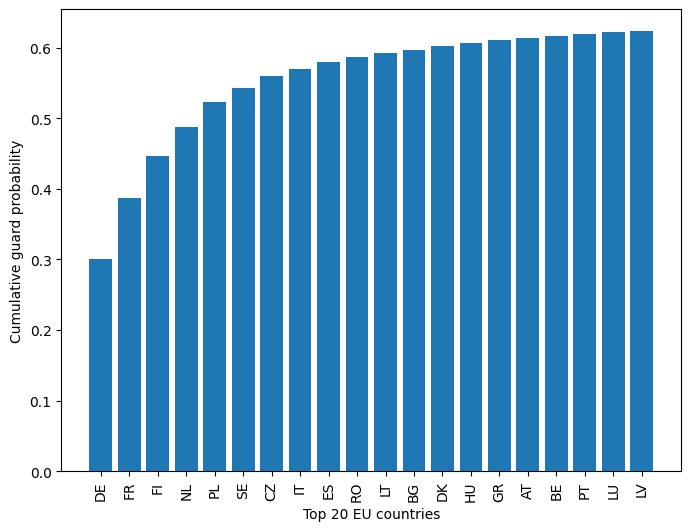

In [435]:
def plot_cumulative_guard_probability_per_eu_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(eu_country_codes_count.keys())
    total = sum(country_codes_count.values())
    lengths = [(s/total) for s in eu_country_codes_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Extract sorted keys from the sorted combined list
    sorted_keys = [item[0] for item in combined]
    sorted_lengths = [item[1] for item in combined]
    # Calculate cumulative probabilities
    cumulative_lengths = [sum(sorted_lengths[:i+1]) for i in range(len(sorted_lengths))]

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], cumulative_lengths[:n_els_to_show])

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} EU countries')
    plt.ylabel('Cumulative guard probability')

    # Display the plot
    plt.show()

plot_cumulative_guard_probability_per_eu_country()

In [436]:
ases_per_country = {}

def get_ases_per_country():
    for key, value in guard_nodes.items():
        as_name = value["as"]
        country_code = value["country_code"]
        if country_code not in ases_per_country:
            ases_per_country[country_code] = set()
        ases_per_country[country_code].add(as_name)

In [437]:
isps_per_country = {}

def get_isps_per_country():
    for key, value in guard_nodes.items():
        isp = value["isp"]
        country_code = value["country_code"]
        if country_code not in isps_per_country:
            isps_per_country[country_code] = set()
        isps_per_country[country_code].add(isp)


In [438]:
get_ases_per_country()
get_isps_per_country()

print("ases_per_country", ases_per_country)
print("isps_per_country", isps_per_country)

ases_per_country {'DE': {'AS208208 Marco Witzgall trading as Marco Witzgall Internetdienstleistungen', 'AS13213 UK-2 Limited', 'AS24940 Hetzner Online GmbH', 'AS58212 dataforest GmbH', 'AS14061 DigitalOcean, LLC', 'AS12731 IPHH Internet Port Hamburg GmbH', 'AS12816 Leibniz-Rechenzentrum', 'AS200482 nexserv GmbH', 'AS34878 Karlsruhe Institute of Technology', 'AS41108 First Root UG (haftungsbeschraenkt)', 'AS60571 David Doepelheuer', 'AS51167 Contabo GmbH', 'AS204911 Digitale Partizipation e.V.', 'AS16276 OVH SAS', 'AS44477 STARK INDUSTRIES SOLUTIONS LTD', 'AS49581 Ferdinand Zink trading as Tube-Hosting', 'AS35366 ISPpro Internet KG', 'AS680 Verein zur Foerderung eines Deutschen Forschungsnetzes e.V.', 'AS47610 RWTH Aachen University', 'AS31898 Oracle Corporation', 'AS553 Universitaet Stuttgart', 'AS60729 Zwiebelfreunde e.V.', 'AS56381 level66.network UG (haftungsbeschraenkt)', 'AS31371 Wissenschaftsladen Dortmund e.V.', 'AS47447 23M GmbH', 'AS211301 Collin Schneeweiss', 'AS197540 netcup

### Plot Ases per country
* This was still not done in our appendix

sorted_lengths (78, 58, 34, 23, 21, 19, 16, 16, 15, 12, 10, 10, 9, 8, 7, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1)


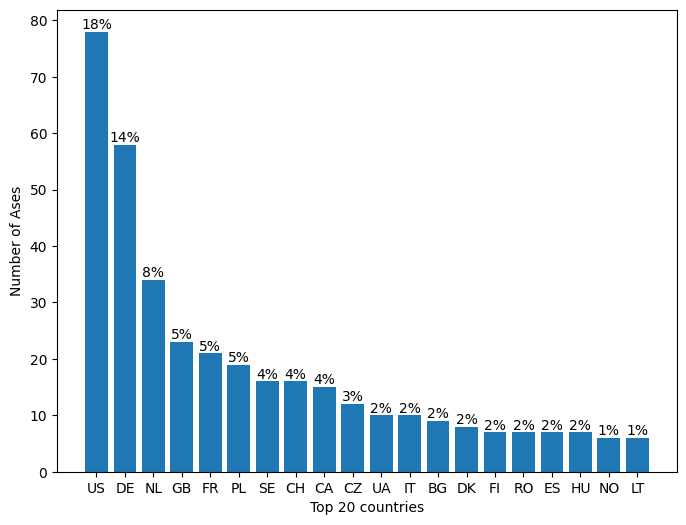

In [439]:
def plot_ases_per_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(ases_per_country.keys())
    lengths = [len(s) for s in ases_per_country.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)
    print("sorted_lengths", sorted_lengths)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    # Add annotations (frequencies) on top of each bar
    for i, length in enumerate(sorted_lengths[:n_els_to_show]):
        plt.text(i, length, "{:.0%}".format(length / sum(lengths)), ha='center', va='bottom')

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} countries')
    plt.ylabel('Number of Ases')

    # Display the plot
    plt.show()

plot_ases_per_country()

### Plot ISPs per country

sorted_lengths (86, 77, 42, 27, 24, 21, 20, 19, 15, 15, 11, 11, 10, 9, 8, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1)


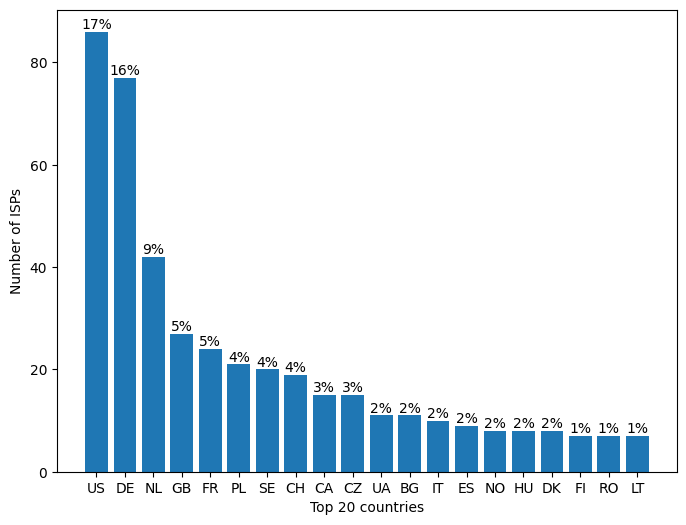

In [440]:
def plot_isps_per_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(isps_per_country.keys())
    lengths = [len(s) for s in isps_per_country.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)
    print("sorted_lengths", sorted_lengths)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    # Add annotations (frequencies) on top of each bar
    for i, length in enumerate(sorted_lengths[:n_els_to_show]):
        plt.text(i, length, "{:.0%}".format(length / sum(lengths)), ha='center', va='bottom')

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} countries')
    plt.ylabel('Number of ISPs')

    # Display the plot
    plt.show()

plot_isps_per_country()

### Some conclusions about colluding ASes and ISPs
Even though most of the ASes intercepting Tor guard node's traffic (atleast 46) are under US jurisdiction, atleast 29 ASes are under Germany's (DE) jurisdiction. But Germany's ASes alone handle around 30% Tor guard traffic, surpassing US's 22% Tor guard traffic coverage. Atleast 12 ASes are under France's (FR) jurisdiction, which alone intercept almost 10% of Tor's guard traffic. Next, atleast 3 ASes are under Finland's (FI) jurisdiction, which intercept around 7% of all Tor guard traffic. Next, atleast 17 ASes are under the Netherlands' (NL) jurisdiction, which intercept around 4% of all Tor guard traffic. 
The top four EU countries with higher guard coverage sum up to 30%+10%+7%+4%=51%, over half the total Tor guard traffic coverage, which would require the cooperation of atleast 29+12+3+17=61 ASes. Another cooperation scenario would be to combine Germany's and US's coverage, which would total up to 30%+22%=52%, which would also be over half the total Tor guard traffic coverage.

In terms of ISPs, the US covers atleast 55, Germany covers atleast 43, France covers atleast 16, Finland covers atleast 3, and Netherlands covers atleast 24. This means that we would need the cooperation of either 43+16+3+24=86 ISPs, or 43+55=98 ISPs to get over half the total Tor guard traffic coverage.

From our experiments, we can deploy the attack successfully having only half of the guard traffic coverage, or even less. As we can see from the following figure, having reduced coverage does not change the overall trend of our classifier's performance. This figure was taken by choosing random traces from both the client and the OS-side corresponding to the intended coverage, and performing correlation on the remaining traces. Since it was random, we took three results to show that changing the covered traces does not impact the results.

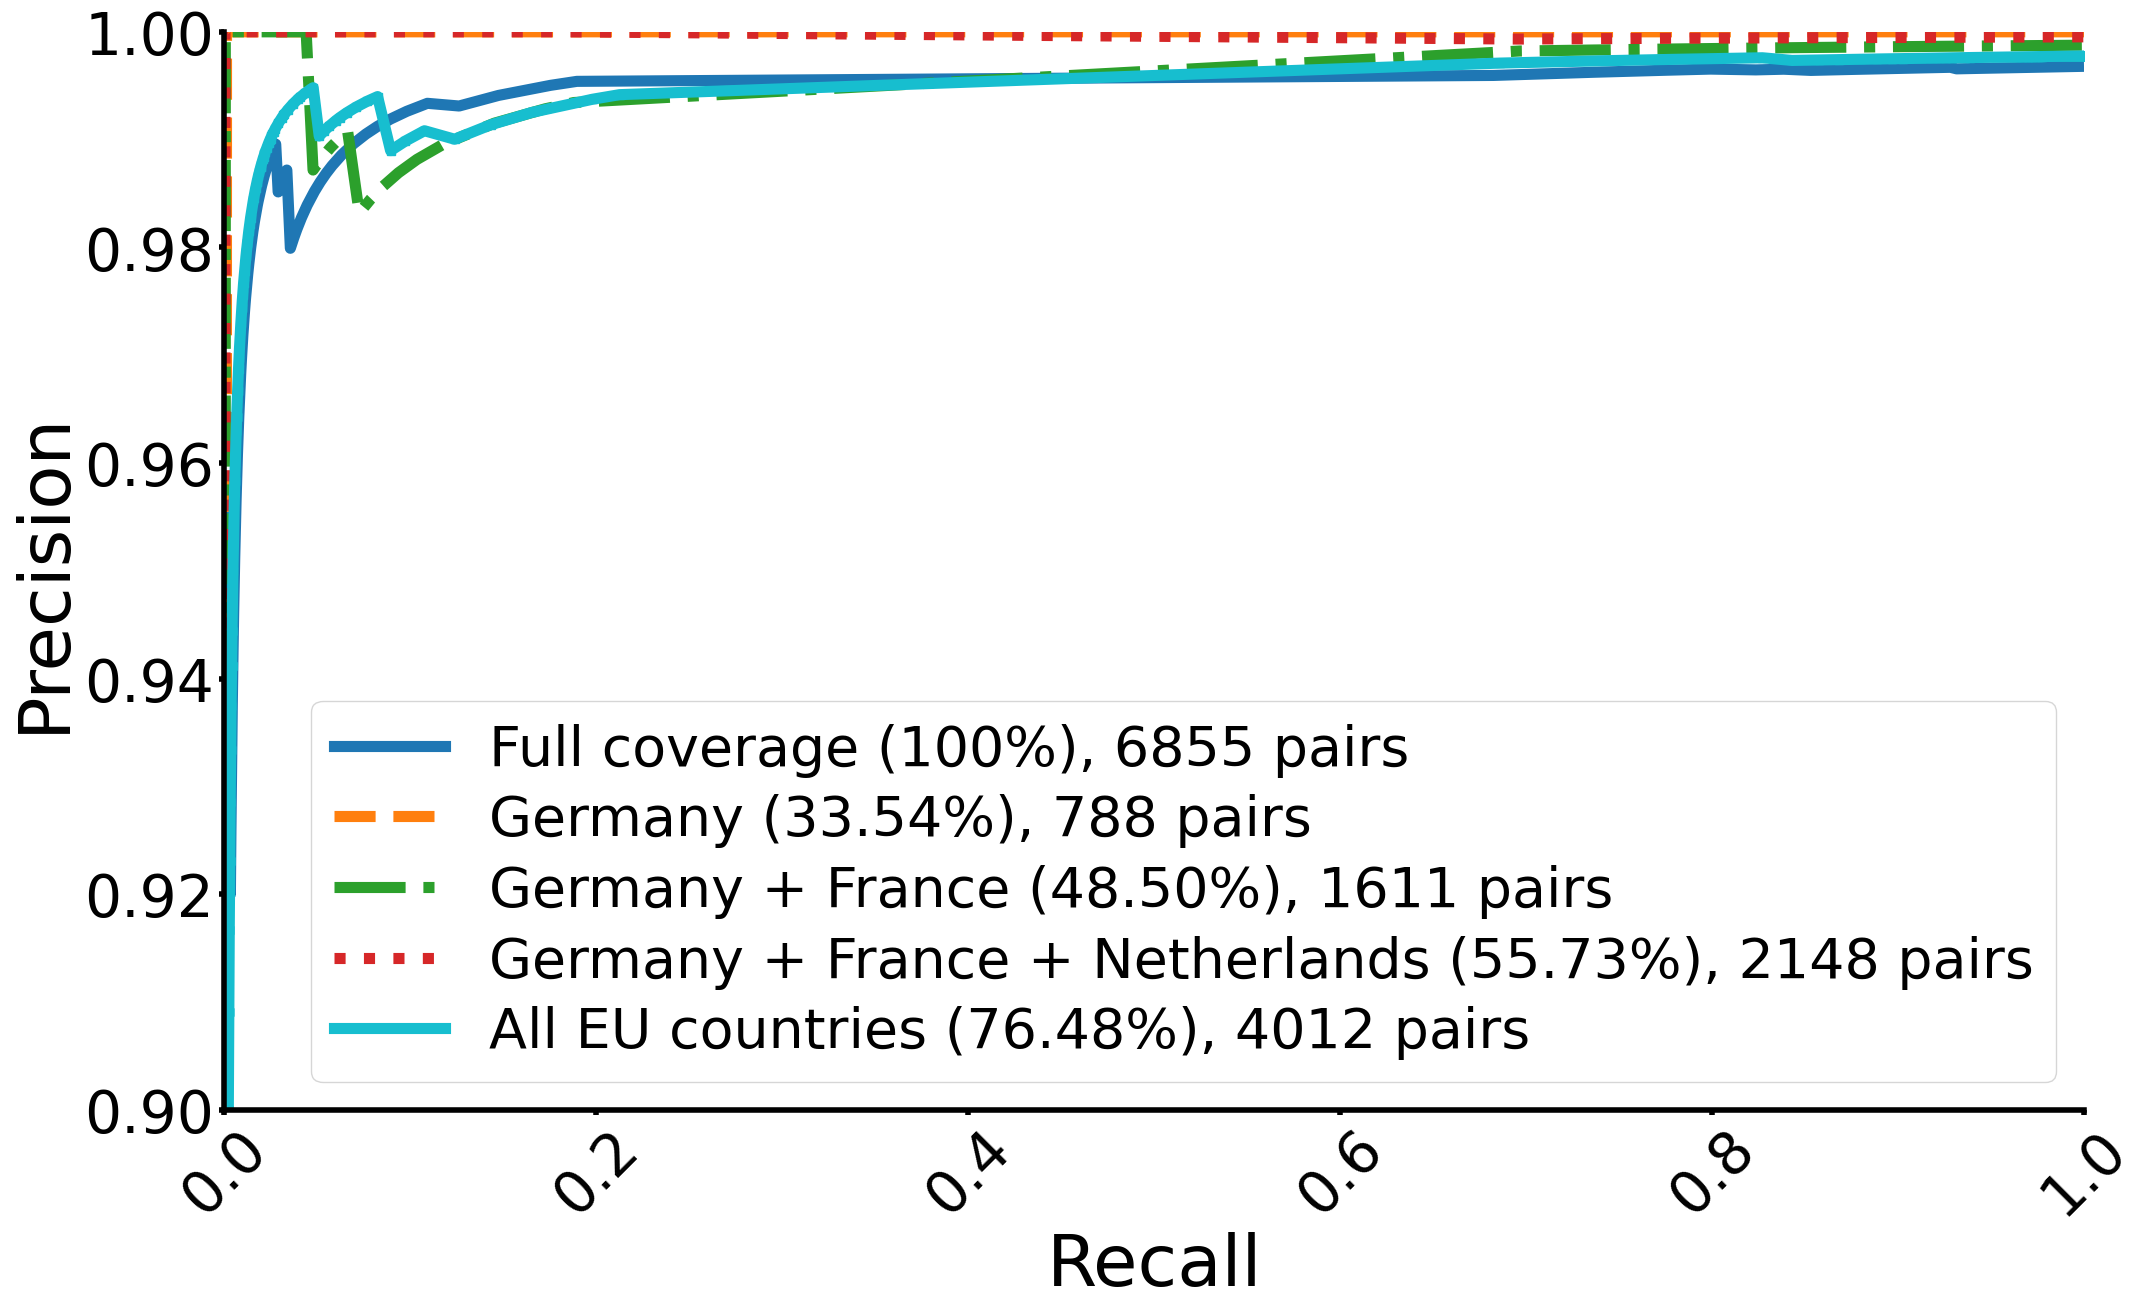

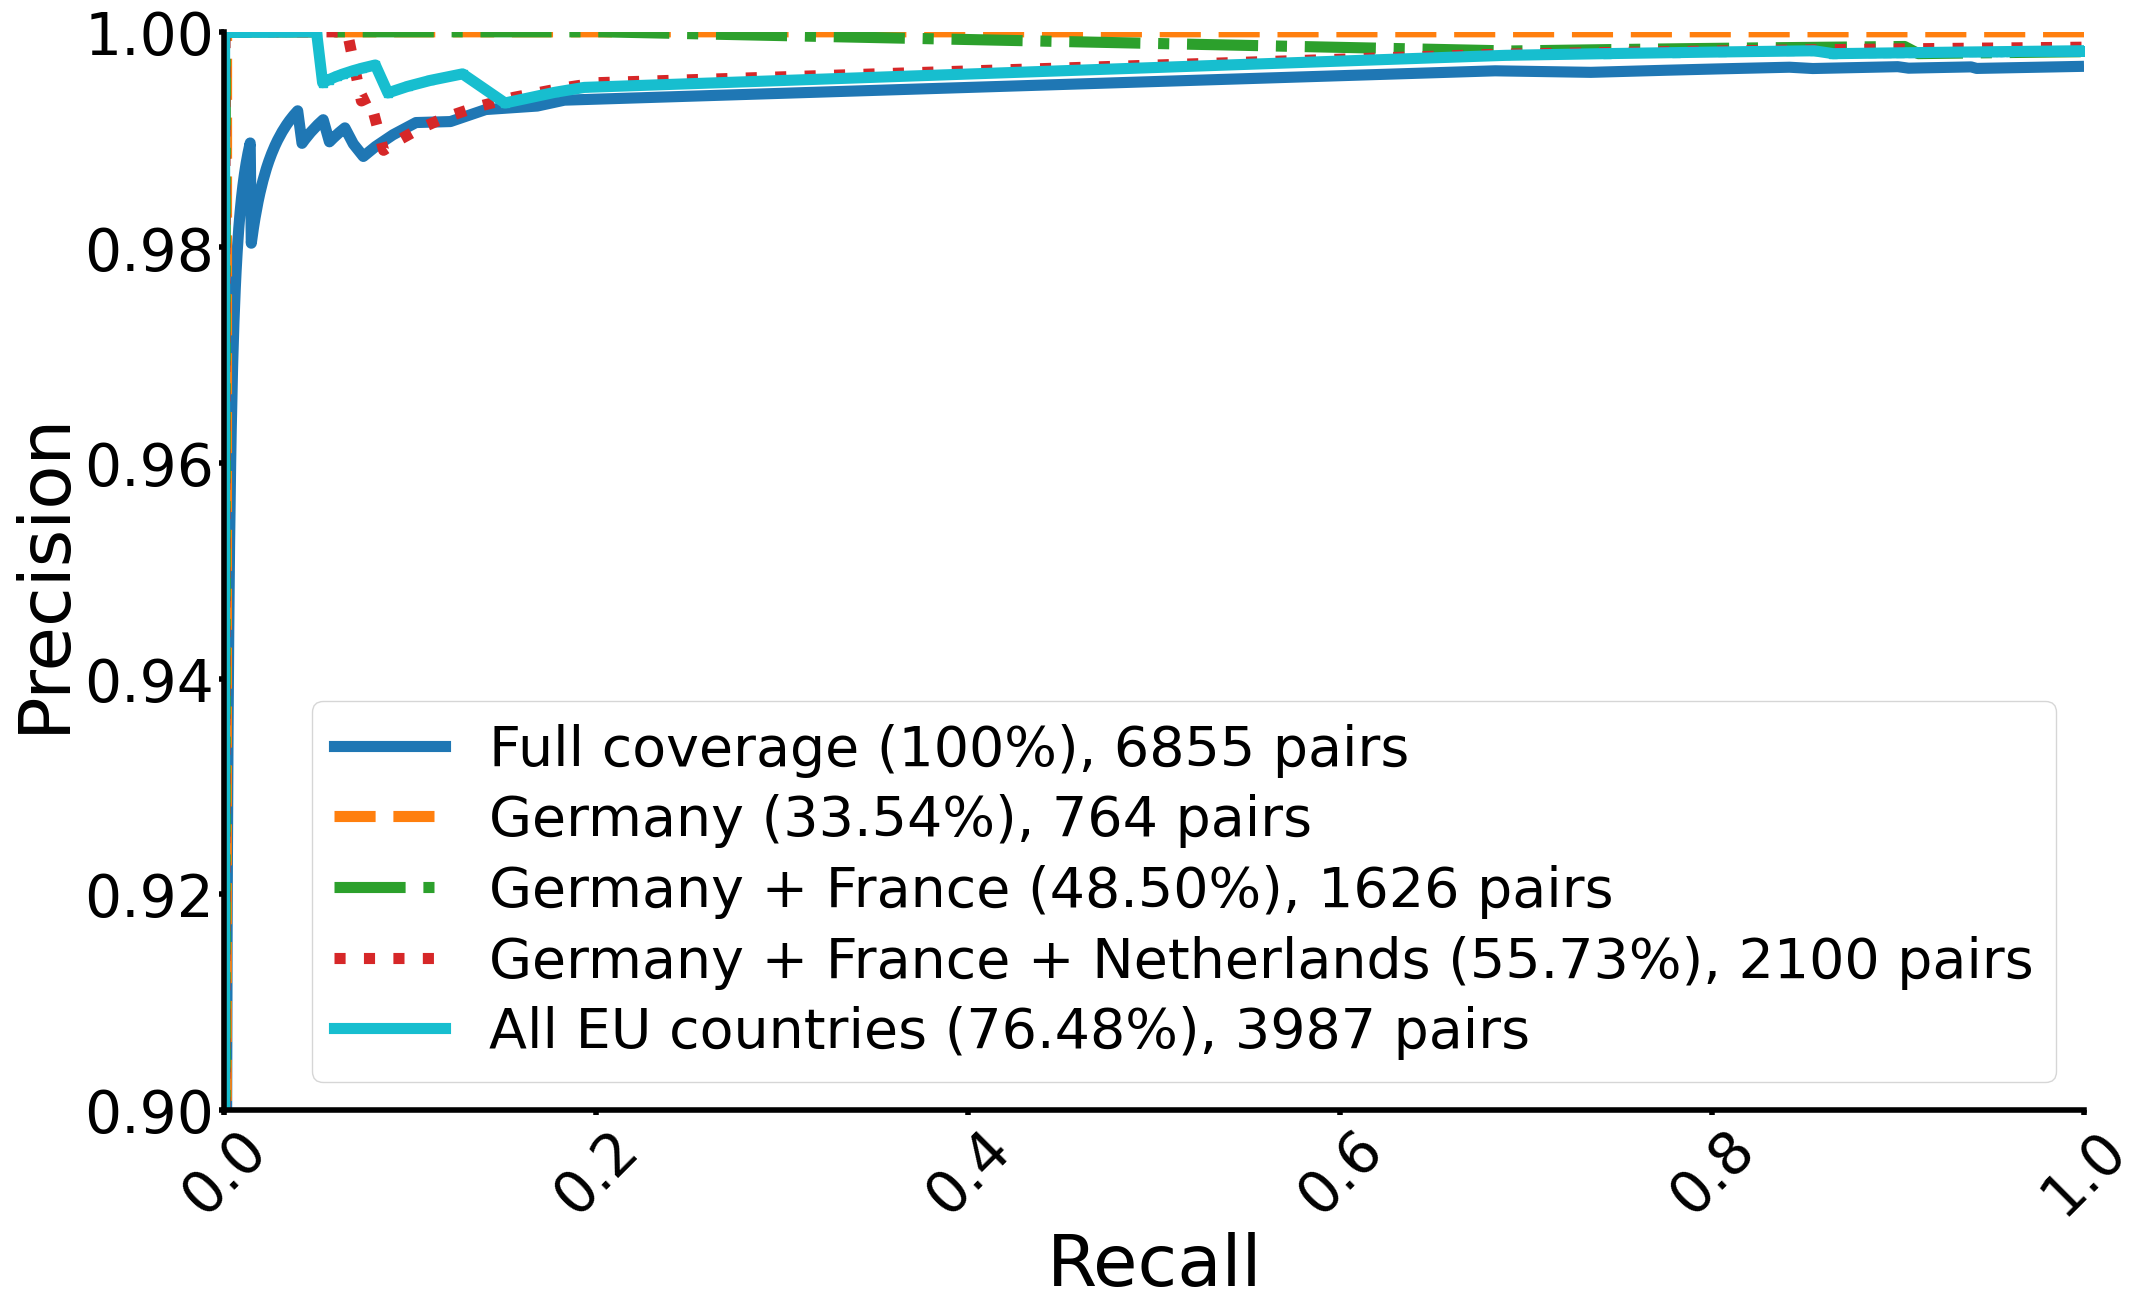

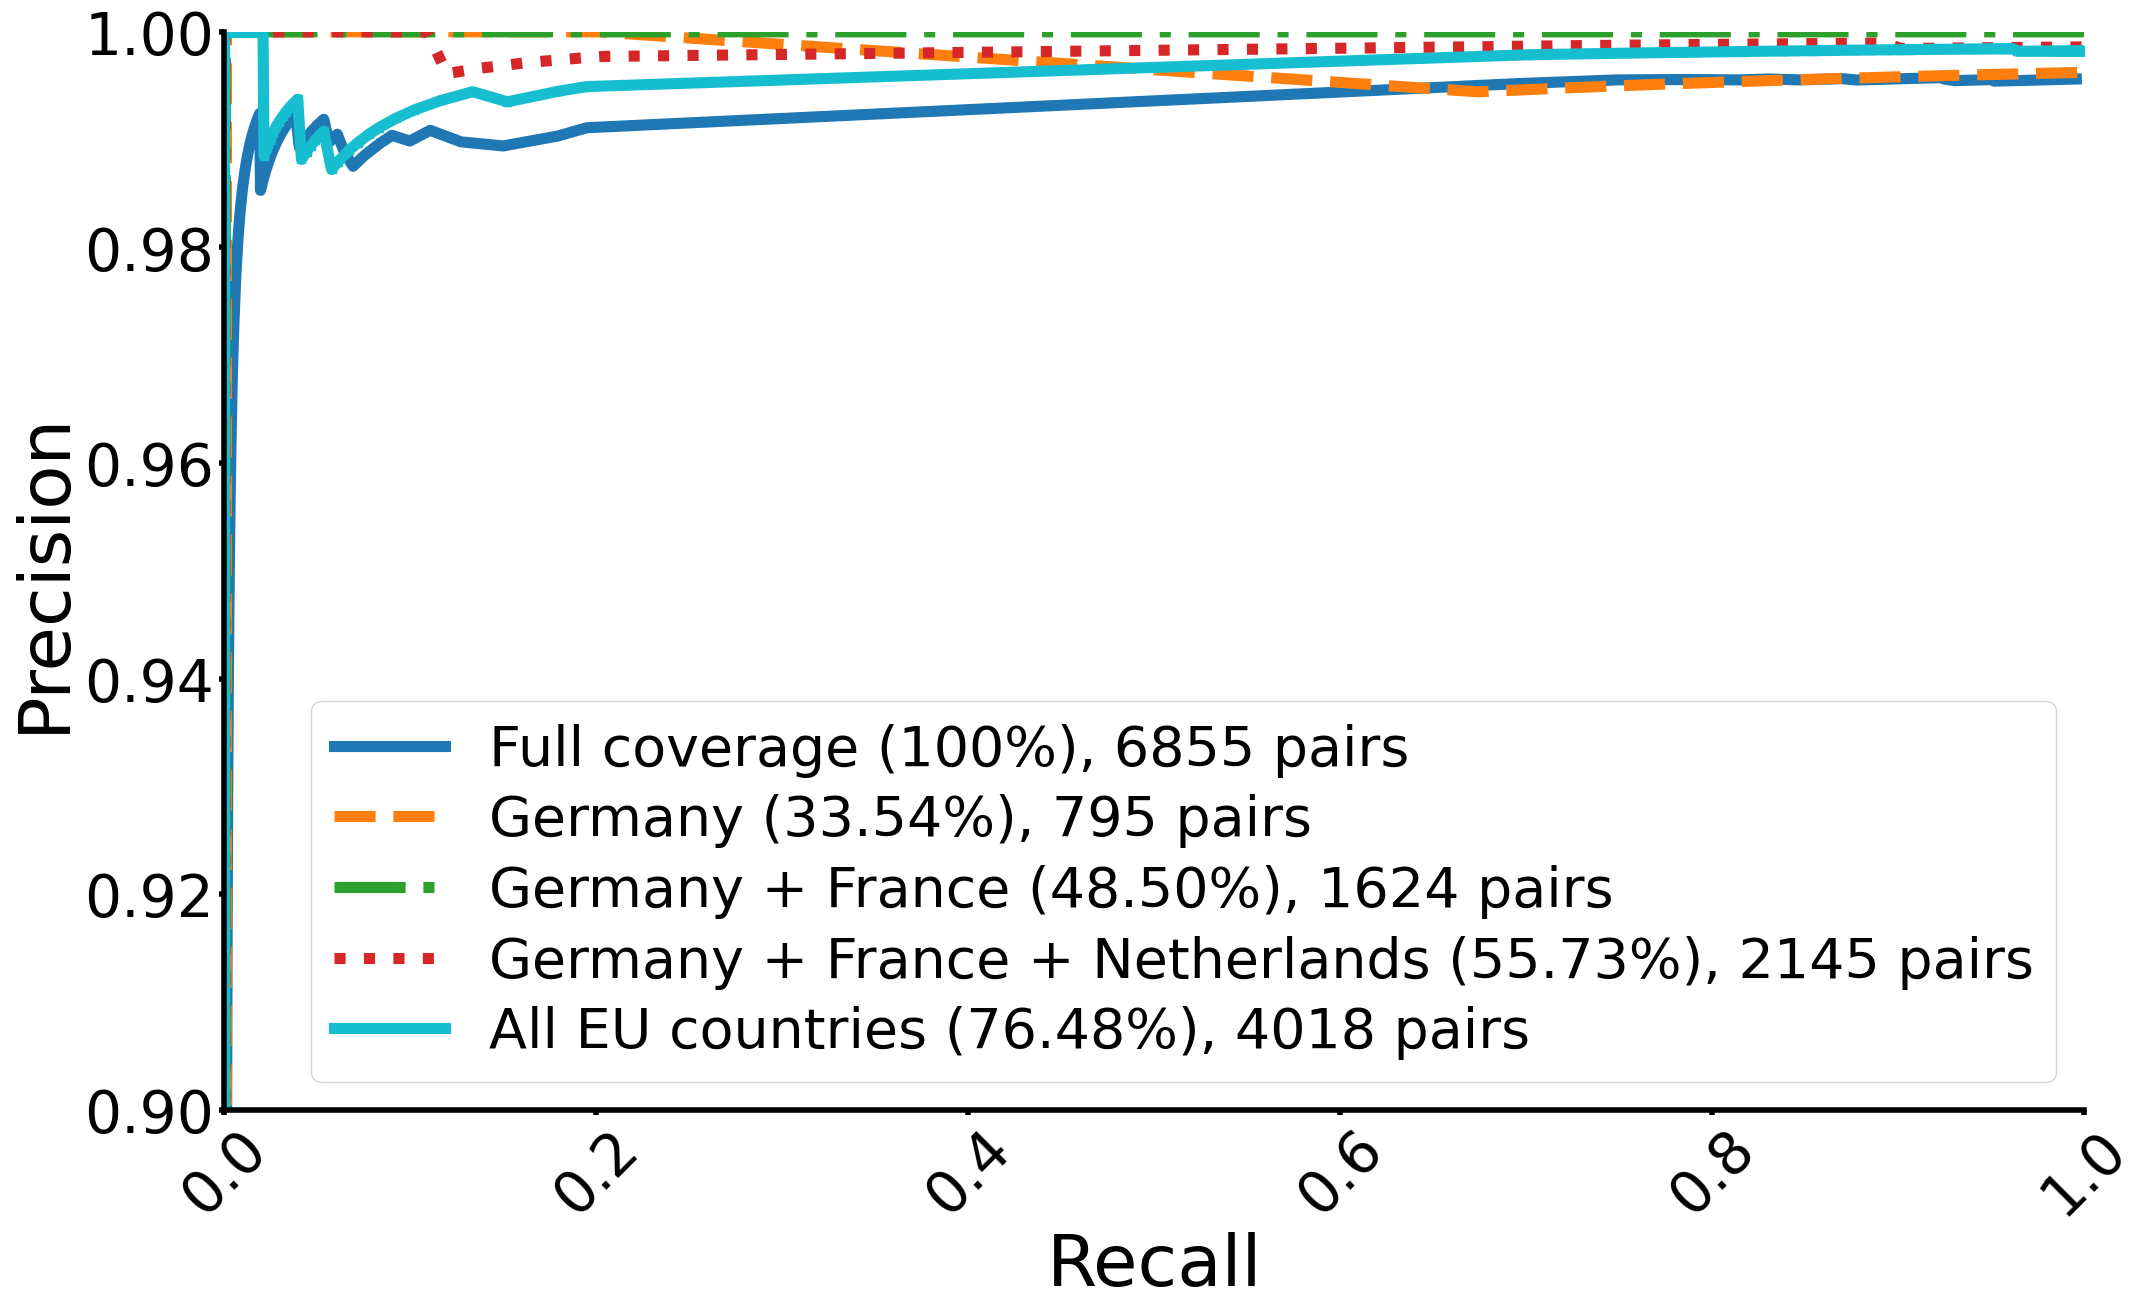

TODO: Full coverage trace should always have the same values, check why they are not exactly the same across the three plots

In [441]:
def print_table_countries_coverage_as_isp():
    data = []
    for country, guard_probability in top_country_guard_probabilities.items():
        data.append([country, guard_probability, len(ases_per_country[country]), len(isps_per_country[country])])

    table = tabulate(data, headers=['Country', 'Guard Probability', 'ASes', 'ISPs'], tablefmt='grid')

    print(table)

print_table_countries_coverage_as_isp()

+-----------+---------------------+--------+--------+
| Country   |   Guard Probability |   ASes |   ISPs |
+===========+=====================+========+========+
| DE        |          0.300022   |     58 |     77 |
+-----------+---------------------+--------+--------+
| US        |          0.247485   |     78 |     86 |
+-----------+---------------------+--------+--------+
| FR        |          0.0871898  |     21 |     24 |
+-----------+---------------------+--------+--------+
| FI        |          0.0596915  |      7 |      7 |
+-----------+---------------------+--------+--------+
| CA        |          0.0409121  |     15 |     15 |
+-----------+---------------------+--------+--------+
| NL        |          0.0406886  |     34 |     42 |
+-----------+---------------------+--------+--------+
| PL        |          0.0348759  |     19 |     21 |
+-----------+---------------------+--------+--------+
| GB        |          0.0335345  |     23 |     27 |
+-----------+---------------

#### ASes coverage

In [442]:
top_ases_countries = {}

def get_top_ases_countries():
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(ases_count.keys())
    total = sum(ases_count.values())
    lengths = [(s/total) for s in ases_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    top_keys = sorted_keys[:n_els_to_show]
    for as_name in top_keys:
        top_ases_countries[as_name] = ases_countries[as_name]

get_top_ases_countries()

In [443]:
def print_table_as_country():
    data = []
    for as_name, country in top_ases_countries.items():
        data.append([as_name, country, as_guard_probabilities[as_name]])

    table = tabulate(data, headers=['AS', 'Country', 'Guard Probability'], tablefmt='grid')

    print(table)

print_table_as_country()

+----------------------------------+--------------------------------------------------------------------------------------+---------------------+
| AS                               | Country                                                                              |   Guard Probability |
+==================================+======================================================================================+=====================+
| AS16276 OVH SAS                  | {'CZ', 'LT', 'PL', 'FI', 'GB', 'FR', 'US', 'IT', 'BE', 'CA', 'DE', 'ES', 'SG', 'PT'} |          0.197183   |
+----------------------------------+--------------------------------------------------------------------------------------+---------------------+
| AS24940 Hetzner Online GmbH      | {'FI', 'DE'}                                                                         |          0.14867    |
+----------------------------------+--------------------------------------------------------------------------------------+-

The top 3 ASes with highest guard traffic coverage observe 19.5%+15%+5.3%=39.8%, and they are all capture Germany's traffic. According to our previous plots, considering Germany has 33.54% guard traffic coverage, our classifier maintains its performance, which can indicate that having the three top ASes colluding would be sufficient to launch our attack successfully.

#### ISPs coverage

In [444]:
top_isps_countries = {}

def get_top_isps_countries():
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(isps_count.keys())
    total = sum(isps_count.values())
    lengths = [(s/total) for s in isps_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    top_keys = sorted_keys[:n_els_to_show]
    for isp in top_keys:
        top_isps_countries[isp] = isps_countries[isp]

get_top_isps_countries()

In [445]:
def print_table_isp_country():
    data = []
    for isp, country in top_isps_countries.items():
        data.append([isp, country, isp_guard_probabilities[isp]])

    table = tabulate(data, headers=['ISP', 'Country', 'Guard Probability'], tablefmt='grid')

    print(table)

print_table_isp_country()

+--------------------------+--------------------------------------------------------------+---------------------+
| ISP                      | Country                                                      |   Guard Probability |
+==========================+==============================================================+=====================+
| OVH SAS                  | {'CZ', 'PL', 'FI', 'GB', 'FR', 'US', 'DE', 'CA', 'ES', 'SG'} |          0.16812    |
+--------------------------+--------------------------------------------------------------+---------------------+
| Hetzner Online GmbH      | {'FI', 'DE', 'US'}                                           |          0.142857   |
+--------------------------+--------------------------------------------------------------+---------------------+
| netcup GmbH              | {'DE', 'AT'}                                                 |          0.052761   |
+--------------------------+------------------------------------------------------------

Even if we consider ISPs, the top three ISPs with highest Tor guard traffic coverage sum up to 16.7%+14.5%+5.3%=36.5%. So, only three colluding ISPs would be sufficient to launch our attack effectively.

### Plot guard coverage in a world map

In [446]:
import geopandas
import pandas as pd
import pycountry
import mapclassify
import numpy as np
import matplotlib.colors as mcolors

In [447]:
def convert_alpha2_to_alpha3_country_code(alpha2_code):
    country = pycountry.countries.get(alpha_2=alpha2_code)
    if country:
        return country.alpha_3
    return None

def get_country_codes_count_df():
    df = pd.DataFrame(list(country_codes_count.items()), columns=['code', 'guards_count'])
    df['code'] = df['code'].apply(convert_alpha2_to_alpha3_country_code)
    return df

country_codes_count_df = get_country_codes_count_df()

total_occurrences = country_codes_count_df['guards_count'].sum()
country_codes_count_df['guards_probability'] = country_codes_count_df['guards_count'] / total_occurrences

In [448]:
def get_countries_data_df():
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    # rename columns to be merged with our data
    world.columns=['pop_est', 'continent', 'name', 'code', 'gdp_md_est', 'geometry']

    return world

world_df = get_countries_data_df()

/tmp/user/1012/ipykernel_1204487/4226040304.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [449]:
# merge world data with our guard coverage data, and replace countries with no data with 0
merged_df = pd.merge(world_df, country_codes_count_df, on='code', how='outer')

# get countries latitutes and longitudes
locations = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

merged_df = merged_df.merge(locations, on='name').sort_values(by='name',ascending=False).reset_index()
# Replace NaN values with 0
merged_df.fillna(0, inplace=True)

# sort dataframe by guards_count values in desceding order
merged_sorted_df = merged_df.sort_values(by='guards_count', ascending=False)

In [450]:
def plot_guard_occurrences_world_map(title, ax):
    # Reverse the order of the colors in the colormap
    cmap_name = 'plasma'
    cmap_reversed = plt.cm.get_cmap(cmap_name)
    cmap_reversed = cmap_reversed.reversed()
    colors = cmap_reversed(np.linspace(0, 1, 256))
    # Replace yellow color with grey
    colors[0] = [0.8, 0.8, 0.8, 1.0]
    custom_cmap = mcolors.ListedColormap(colors)

    # plot confirmed cases world map 
    merged_sorted_df.plot(column='guards_count', 
                    scheme="Quantiles",
                    k=20,
                    legend=True,
                    cmap=custom_cmap,
                    ax=ax)
    plt.title(title, fontsize=25)

/tmp/user/1012/ipykernel_1204487/278495409.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap(cmap_name)
/home/dlopes/.local/lib/python3.9/site-packages/mapclassify/classifiers.py:257: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 6.
  warnings.warn(


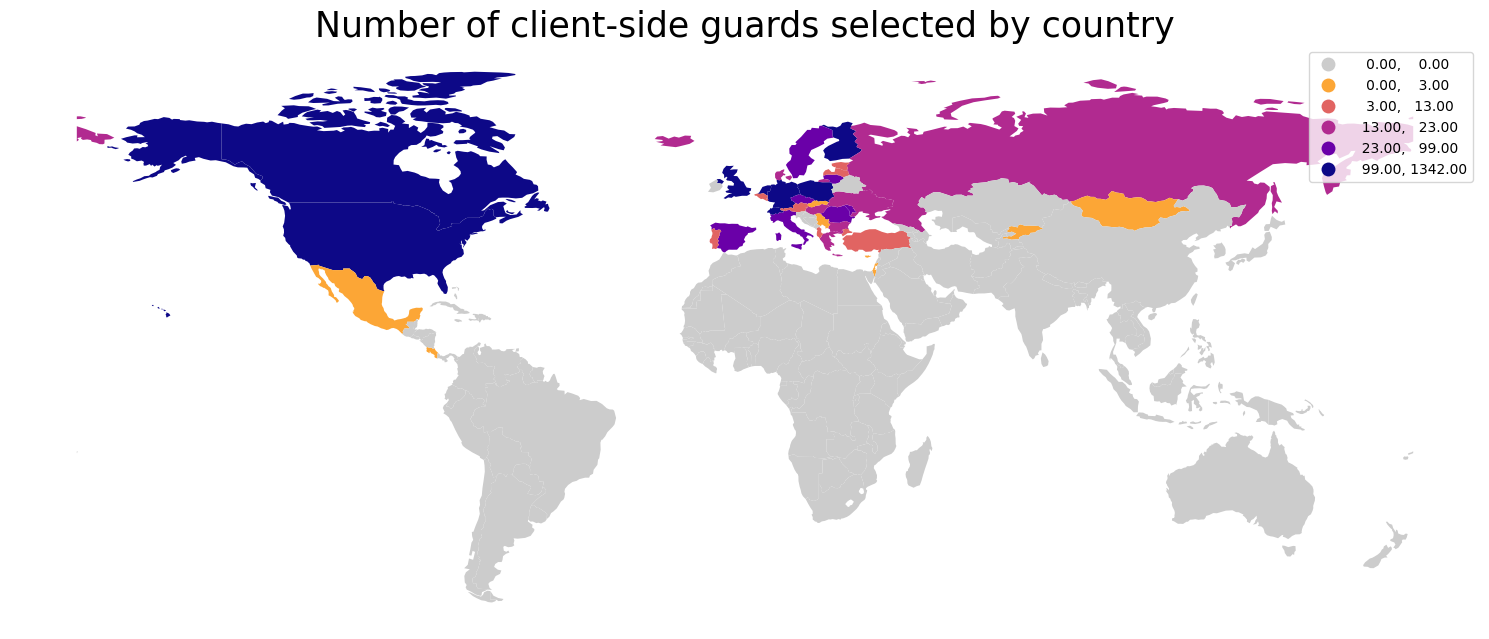

In [451]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_guard_occurrences_world_map('Number of client-side guards selected by country', ax)

# Remove x and y axes
plt.axis('off')
plt.tight_layout()
plt.show()

/tmp/user/1012/ipykernel_1204487/278495409.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap(cmap_name)
/home/dlopes/.local/lib/python3.9/site-packages/mapclassify/classifiers.py:257: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 6.
  warnings.warn(
/home/dlopes/.local/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


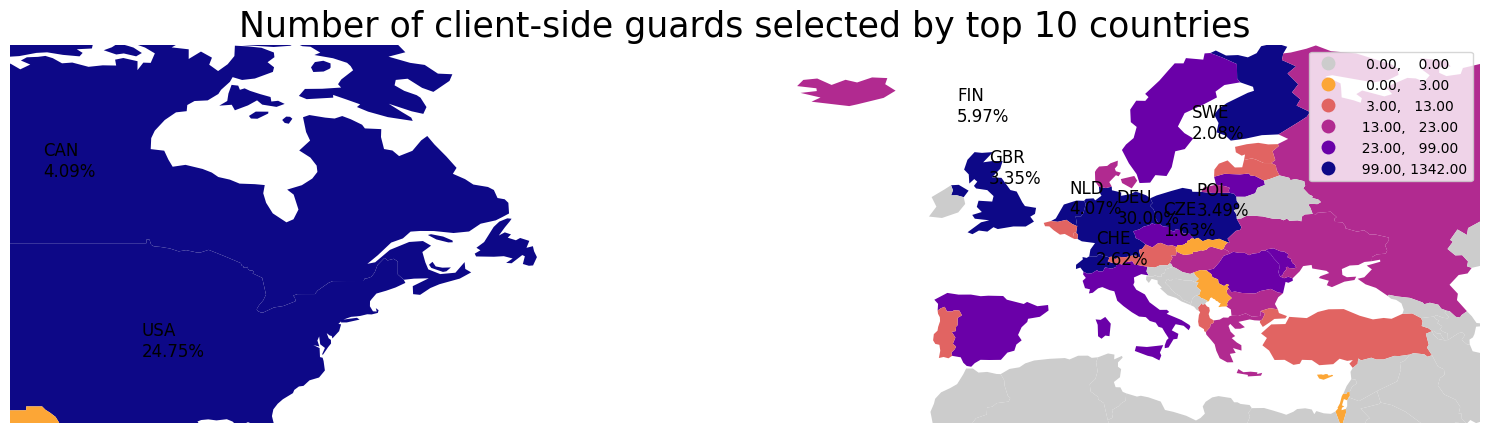

In [455]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_guard_occurrences_world_map('Number of client-side guards selected by top 10 countries', ax)

# Zoom in
ax.set_xlim(-110, 50)
ax.set_ylim(30, 70)

top_countries_df = merged_sorted_df.head(10)
top_countries_df['cumulative_guards_probability'] = top_countries_df['guards_probability'].cumsum()
for index, row in top_countries_df.iterrows():
    plt.text(float(top_countries_df.longitude[index]), float(top_countries_df.latitude[index]), f"{top_countries_df.code[index]}\n{top_countries_df.guards_probability[index] * 100:.2f}%", fontsize=12)

# Remove x and y axes
plt.axis('off')
plt.tight_layout()
plt.show()

In [457]:
def generate_markdown_table_with_top_countries_probabilities(df):
    cp_df = df.copy(deep=True)
    cp_df['guards_probability'] = (df['guards_probability'] * 100).round(2).astype(str) + '%'
    cp_df['cumulative_guards_probability'] = (df['cumulative_guards_probability'] * 100).round(2).astype(str) + '%'
    return cp_df[['name', 'guards_probability', 'cumulative_guards_probability']].to_markdown(index=False)

print(generate_markdown_table_with_top_countries_probabilities(top_countries_df))

| name                     | guards_probability   | cumulative_guards_probability   |
|:-------------------------|:---------------------|:--------------------------------|
| Germany                  | 30.0%                | 30.0%                           |
| United States of America | 24.75%               | 54.75%                          |
| Finland                  | 5.97%                | 60.72%                          |
| Canada                   | 4.09%                | 64.81%                          |
| Netherlands              | 4.07%                | 68.88%                          |
| Poland                   | 3.49%                | 72.37%                          |
| United Kingdom           | 3.35%                | 75.72%                          |
| Switzerland              | 2.62%                | 78.34%                          |
| Sweden                   | 2.08%                | 80.42%                          |
| Czechia                  | 1.63%                | 82

# TODOs
